In [1]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('../../../DataSets/monthly-beer-production-in-austr.csv')
df.head()

,Month,Monthly beer production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


In [3]:
df.shape

(476, 2)

In [4]:
df['Month']=pd.to_datetime(df['Month'])

In [5]:
df = df.set_index('Month')

In [6]:
df.head()

,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


In [7]:
train_data= df[:len(df)-50]
train_data.shape

(426, 1)

In [8]:
test_data= df[len(df)-50:]
test_data.shape

(50, 1)

# scaling

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler = MinMaxScaler()
scaler.fit(train_data)

MinMaxScaler()

In [11]:
train_data_scaled = scaler.transform(train_data)
test_data_scaled = scaler.transform(test_data)

In [12]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [13]:
n_inputs= 15
n_features= 1
generator = TimeseriesGenerator(train_data_scaled,train_data_scaled,length=n_inputs,batch_size=2)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [15]:
model_lstm = Sequential()
model_lstm.add(LSTM(90, activation='relu',input_shape= (n_inputs,n_features),return_sequences=True))
model_lstm.add(LSTM(90,return_sequences=False))

model_lstm.add(Dense(1))

model_lstm.compile(loss='mse', metrics=['accuracy'])


In [16]:
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15, 90)            33120     
                                                                 
 lstm_1 (LSTM)               (None, 90)                65160     
                                                                 
 dense (Dense)               (None, 1)                 91        
                                                                 
Total params: 98,371
Trainable params: 98,371
Non-trainable params: 0
_________________________________________________________________


In [17]:
model_lstm.fit_generator(generator,epochs=20)

Epoch 1/20
206/206 [==============================] - 18s 31ms/step - loss: 0.0249 - accuracy: 0.0024
Epoch 2/20
206/206 [==============================] - 4s 22ms/step - loss: 0.0190 - accuracy: 0.0024
Epoch 3/20
206/206 [==============================] - 4s 20ms/step - loss: 0.0129 - accuracy: 0.0024
Epoch 4/20
206/206 [==============================] - 4s 18ms/step - loss: 0.0106 - accuracy: 0.0024
Epoch 5/20
206/206 [==============================] - 4s 19ms/step - loss: 0.0105 - accuracy: 0.0024
Epoch 6/20
206/206 [==============================] - 4s 18ms/step - loss: 0.0095 - accuracy: 0.0024
Epoch 7/20
206/206 [==============================] - 4s 17ms/step - loss: 0.0096 - accuracy: 0.0024
Epoch 8/20
206/206 [==============================] - 4s 18ms/step - loss: 0.0096 - accuracy: 0.0024
Epoch 9/20
206/206 [==============================] - 4s 18ms/step - loss: 0.0093 - accuracy: 0.0024
Epoch 10/20
206/206 [==============================] - 4s 18ms/step - loss: 0.0091 - accur

In [18]:
test_generator = TimeseriesGenerator(test_data_scaled,test_data_scaled,length=n_inputs)

In [19]:
yp_lstm= model_lstm.predict(test_generator)

1/1 [==============================] - 2s 2s/step


In [20]:
yp_unscaled_LSTM= scaler.inverse_transform(yp_lstm)

In [21]:
yp_unscaled_LSTM

array([[176.70316],
       [184.11075],
       [181.34723],
       [169.5464 ],
       [161.74977],
       [156.60982],
       [152.65253],
       [149.40646],
       [146.40572],
       [144.7282 ],
       [148.41801],
       [157.716  ],
       [168.39844],
       [176.87335],
       [176.682  ],
       [168.12132],
       [160.90828],
       [156.0577 ],
       [152.92203],
       [149.12283],
       [144.85475],
       [141.9881 ],
       [144.1863 ],
       [154.04694],
       [167.4497 ],
       [176.65521],
       [176.36302],
       [167.34163],
       [158.80174],
       [153.40231],
       [148.25813],
       [142.85054],
       [139.44424],
       [139.50801],
       [146.14221]], dtype=float32)

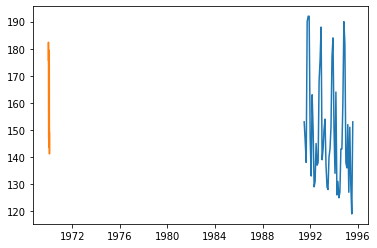

In [47]:
plt.plot(test_data['Monthly beer production'])
plt.plot(yp_unscaled_LSTM)